### Practice test for week 4 - Titanic Data Analysis

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations

### Read in the dataset

In [11]:
titanic = pd.read_csv("Titanic+Data+Set.csv")

### View the first few rows of the dataset

In [82]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.25000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.28330,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.92500,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.10000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.05000,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.45830,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.86250,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.07500,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.13330,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.07080,NaN,C


### Question 1: Check the shape of the dataset.  What is the number of rows and columns in the data?

In [13]:
titanic.shape

(891, 12)

### Check the datatype of the variables to make sure that the data is read in properly

In [14]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Let us analyse the quantitative variables in the dataset

In [27]:
titanicd.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00000,891.00000,891.00000,714.00000,891.00000,891.00000,891.00000
mean,446.00000,0.38384,2.30864,29.69912,0.52301,0.38159,32.20421
std,257.35384,0.48659,0.83607,14.52650,1.10274,0.80606,49.69343
min,1.00000,0.00000,1.00000,0.42000,0.00000,0.00000,0.00000
25%,223.50000,0.00000,2.00000,20.12500,0.00000,0.00000,7.91040
50%,446.00000,0.00000,3.00000,28.00000,0.00000,0.00000,14.45420
75%,668.50000,1.00000,3.00000,38.00000,1.00000,0.00000,31.00000
max,891.00000,1.00000,3.00000,80.00000,8.00000,6.00000,512.32920


### Question 2: Find the total number of missing values in the data.

In [88]:
# One way to find missing values

def missing_check(df):
    total = titanic.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (titanic.isnull().sum()/titanic.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(titanic)

,Total,Percent
Cabin,687,0.77104
Age,177,0.19865
Embarked,2,0.00224
PassengerId,0,0.00000
Survived,0,0.00000
Pclass,0,0.00000
Name,0,0.00000
Sex,0,0.00000
SibSp,0,0.00000
Parch,0,0.00000


In [86]:
# Simpler and cleaner way to do it
titanic.isnull().sum().sum() # Prints the sum of missing values in the dataframe 'titanic'

866

### Question 3: Drop the column with the maximum number of missing values and then find the number missing values.

In [94]:
titanicd = titanic.drop('Cabin', 1)

titanicd.head(10) # You can see that column 'Cabin' was dropped

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.25000,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.28330,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.92500,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.10000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.05000,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.45830,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.86250,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.07500,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.13330,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.07080,C


In [95]:
titanicd.isnull().sum().sum()

179

Observation: there are now 179 missing values. 

### Question 4: Check the correlation of the variables, which variables have an absolute correlation value greater than 0.5 with 'Pclass'?

In [98]:
titanicd.corr()[abs(titanicd.corr()['Pclass'])>0.5]  #df.corr() prints the correlation matix for the dataframe 'titanicd'.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Pclass,-0.03514,-0.33848,1.00000,-0.36923,0.08308,0.01844,-0.54950
Fare,0.01266,0.25731,-0.54950,0.09607,0.15965,0.21622,1.00000


Observation: Pclass and Fare. 

In [100]:
#Another way to check for the correlation
correlation = titanicd.corr() # creating a 2-D Matrix with correlation plots
correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00000,-0.00501,-0.03514,0.03685,-0.05753,-0.00165,0.01266
Survived,-0.00501,1.00000,-0.33848,-0.07722,-0.03532,0.08163,0.25731
Pclass,-0.03514,-0.33848,1.00000,-0.36923,0.08308,0.01844,-0.54950
Age,0.03685,-0.07722,-0.36923,1.00000,-0.30825,-0.18912,0.09607
SibSp,-0.05753,-0.03532,0.08308,-0.30825,1.00000,0.41484,0.15965
Parch,-0.00165,0.08163,0.01844,-0.18912,0.41484,1.00000,0.21622
Fare,0.01266,0.25731,-0.54950,0.09607,0.15965,0.21622,1.00000


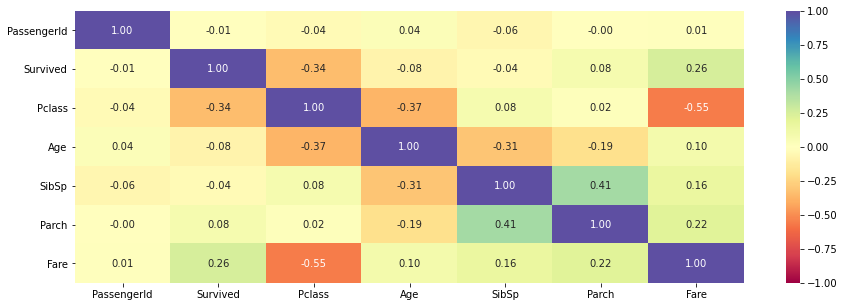

In [102]:
# And another way to check for the correlation
plt.figure(figsize=(15, 5))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Plot a scatterplot for "Age" vs "Sex" with hue = "Survived". Which of the following can be inferred from the graph?

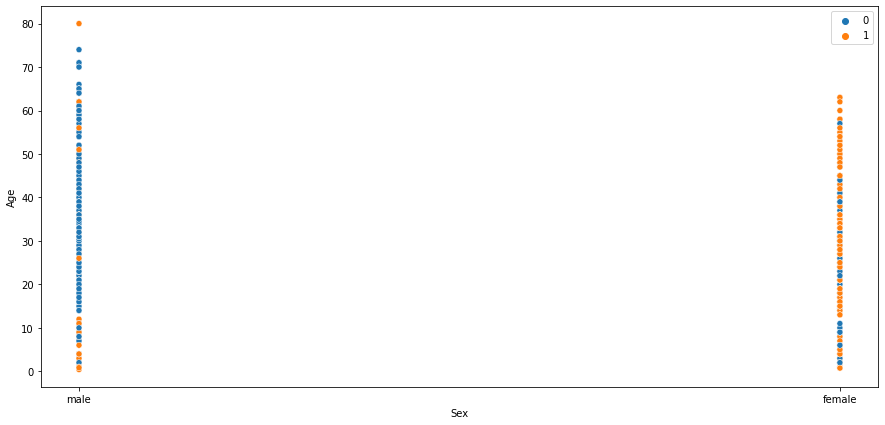

In [107]:
plt.figure(figsize=(15, 7)) # To resize the plot
sns.scatterplot(x='Sex', y='Age', data=titanicd, ci=None, hue = 'Survived') #estimator=sum,
plt.legend(bbox_to_anchor=(1, 1))
#plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

Observation: most of the females survived, while only a few males survived.

### Question 6: Which of the following statements is correct.

In [108]:
titanicd.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00000,891.00000,891.00000,714.00000,891.00000,891.00000,891.00000
mean,446.00000,0.38384,2.30864,29.69912,0.52301,0.38159,32.20421
std,257.35384,0.48659,0.83607,14.52650,1.10274,0.80606,49.69343
min,1.00000,0.00000,1.00000,0.42000,0.00000,0.00000,0.00000
25%,223.50000,0.00000,2.00000,20.12500,0.00000,0.00000,7.91040
50%,446.00000,0.00000,3.00000,28.00000,0.00000,0.00000,14.45420
75%,668.50000,1.00000,3.00000,38.00000,1.00000,0.00000,31.00000
max,891.00000,1.00000,3.00000,80.00000,8.00000,6.00000,512.32920


Observation: The minimum value of Fare is 0 and maximum value if 512

### Question 7: Which of the following statements is true for the 'Parch' variable?

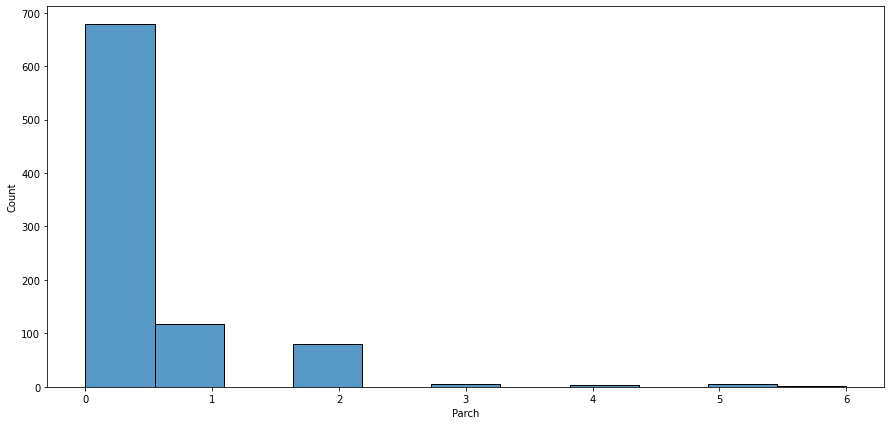

In [118]:
plt.figure(figsize=(15, 7)) # To resize the plot
sns.histplot(titanicd['Parch'])
plt.show()

Observation: The variable has a heavy right tail.

### Question 8: Which of the followings can be inferred from the barplot of Pclass vs Age with hue = Survived.

A. People with the highest age belong to Pclass = 1.

B. Pclass doesn't seem to have much difference on the number of people who survived or not.

C. People with higher age survived less as compared to people with lesser age.

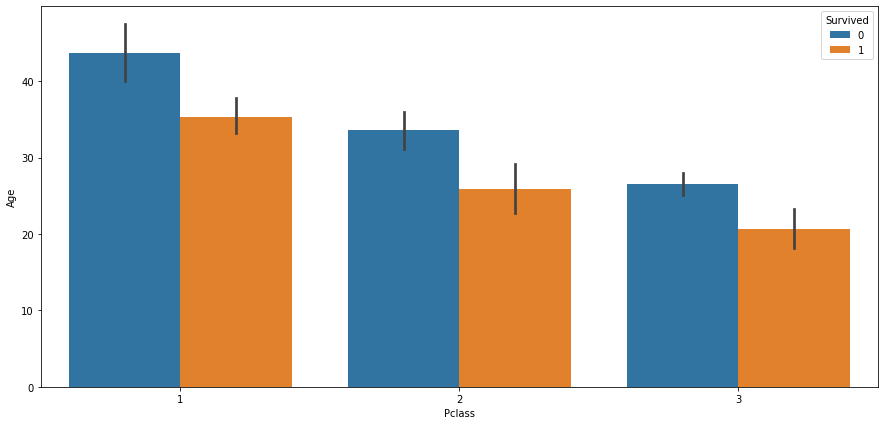

In [117]:
plt.figure(figsize=(15, 7)) # To resize the plot
sns.barplot(x='Pclass', y='Age', data=titanicd, hue='Survived')
plt.show()

Observation: A and C are correct.

### Question 9: Which of the following statement is true?

[Hint: Use groupby on Pclass]

In [128]:
titanicd.groupby(by=['Pclass'])['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [139]:
# Another way to solve

pd.crosstab(titanicd['Survived'],titanicd['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


Observation: most of the people who survived were from 1st class.

### Question 10: Which of the following statements can be inferred from the count plot of 'Embarked' with hue = 'Survived'?

A. Most of the people were from 'Embarked' = S

B. Most of the people who survived were from 'Embarked' = S

C. The difference in the number of people who survived and not survived is least for 'Embarked' = S

D. The least number of observations available are for 'Embarked' = Q

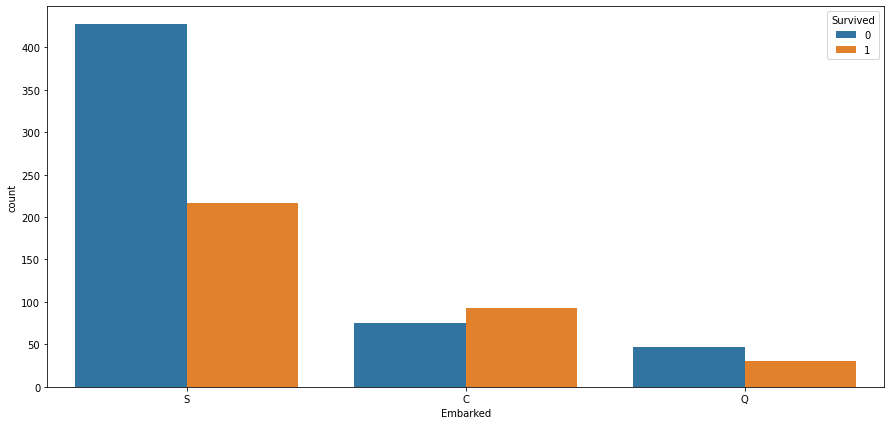

In [132]:
plt.figure(figsize=(15, 7)) # To resize the plot
sns.countplot(x='Embarked', hue='Survived', data=titanicd)
plt.show()

Observation: A, B, and D

### Question 11: Which of the following statements can be inferred from the Boxplot of 'Fare' with hue = 'Sex'?

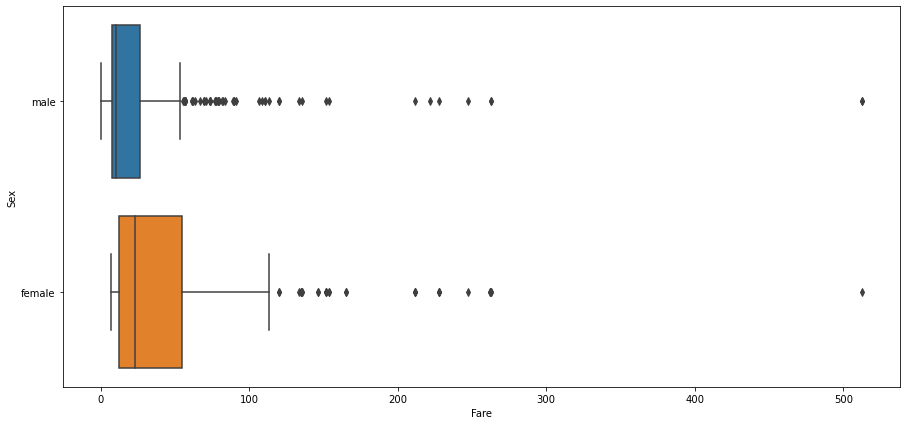

In [135]:
# Which of the following statements can be inferred from the Boxplot of 'Fare' with hue = 'Sex'?
# Did they mean to say 'Boxplot of 'Fare' and 'Sex'?

plt.figure(figsize=(15, 7)) # To resize the plot
sns.boxplot(data=titanicd, x ='Fare', y = 'Sex')
plt.show()

Observation: There are many outliers in the 'Fare' column for both 'female' and 'male'.